# Лабораторная работа №2
## Диаграмма совхождений

### Выполнил: Емельянов Андрей Сергеевич гр. 8ПМ21

## Описание задания

**Цель работы**: выбрать одну из пьес Шекспира (на русском языке) - Макбет, Кориолан и т.д. Разработать алгоритм извлечения имён участвующих в сцене персонажей (не путать сцену с актом). Счёт идёт по сценам. Если в одной сцене появлялись 2 персонажа, то +1 вхождение.
Провести замеры времени выполнения извлечения имен и итогового подсчета вхождений. Рекомендуется проводить измерения по мере внесения изменений в код.

**Входные данные**: текст произведения.

**Выходные данные**: тепловая карта сходства (heatmap, на осях X и Y - имена персонажей).

## Ход работы

### Импорт библиотек и чтение данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
file = open('mcbeth.txt', 'r')
lines = file.readlines()[1:]

### Описание функций и констант

Функции для формирования коллекции терминов, списка имен и матрицы терминов

In [3]:
def get_collection(data):
    dictionary = set(data[0][1])
    for arr in data:
        dictionary = dictionary.union(set(arr[1]))

    return list(dictionary)

def get_names(data):
    names = []
    for arr in data:
        names.append(arr[0])

    return pd.Series(names)

def matrix(data):
    collection = get_collection(data)
    names = get_names(data)
    matrix = []
    for i in range(len(data)):
        matrix.append([])
        for word in collection:
            matrix[i].append(word in data[i][1])

    df = pd.DataFrame(data=matrix, columns=collection, index=names)
    df = df.reindex(sorted(df.columns), axis=1)
    return df

Список фильтруемых фраз, которые алгоритм относит к действующим лицам пьесы

In [4]:
STOP_WORDS = ["Там", "Старшину уводят", "Они вдвойне", "Теперь", "Наш повелитель", 
              "Никто", "Полнота", "Хриплый ворон", "О, никогда", "Войдите", "Все", 
              "Смертельная стрела", "Король сегодня", "Оба Убийцы", "Добыча", "Он постыдно", 
              "Благодарим", "Вот теперь", "Жадность", "Несдержность чувств", "В легионах", 
              "Благополучна ль", "Кто осудит", "Здесь больной", "Подождем", "Она"]

### Выполнение задания

Формирование корпуса для данной задачи:
* Документы - сцены актов
* Термины - действующие лица сцены

Время начала выполнения блока обработки документа

In [5]:
start_time = time.time()

Алгоритм извлечения разметки пьесы и действующих лиц

In [6]:
corpus = []
sc_count = -1
act_buf = ""
for line in lines:
    if line.find(chr(20)) != -1 or line.find(chr(21)) != -1:
        if line.find("АКТ") != -1:
            act_buf = line.strip().replace(chr(20), "").replace(chr(21), "")
        if line.find("СЦЕНА") != -1:
            corpus.append([])
            sc_count +=1
            corpus[sc_count].append(act_buf+": "+line.strip().replace(chr(20), "").replace(chr(21), ""))
            corpus[sc_count].append([])
    if len(line.strip().split(" ")) == 1 and line.strip().isalpha() and sc_count != -1 and line.strip() not in STOP_WORDS:
        corpus[sc_count][1].append(line.strip())
    if len(line.strip().split(" ")) == 2 and line.strip().split(" ")[1].isalpha() and sc_count != -1 and line.strip() not in STOP_WORDS:
        corpus[sc_count][1].append(line.strip())

Нормализация действующих лиц

In [7]:
for i in range(len(corpus)):
    for j, word in enumerate(corpus[i][1]):
        if len(word.split(" ")) == 2:
            corpus[i][1][j] = corpus[i][1][j].split(" ")[1]
        if word.lower().find('лорды') != -1:
            corpus[i][1][j] = "Лорд"
        if word.lower().find('солдаты') != -1:
            corpus[i][1][j] = "Солдат"
        if word.lower().find('дама') != -1:
            corpus[i][1][j] = "Придворная дама"

Просмотр действующих лиц каждой сцены

In [8]:
for sc in corpus:
    print(set(sc[1]))

{'Ведьма'}
{'Старшина', 'Росс', 'Малькольм', 'Дункан', 'Леннокс'}
{'Ангус', 'Банко', 'Росс', 'Макбет', 'Ведьма'}
{'Банко', 'Макбет', 'Дункан', 'Малькольм'}
{'Макбет', 'Гонец'}
{'Банко', 'Дункан', 'Макбет'}
{'Макбет'}
{'Макбет', 'Банко', 'Флинс'}
{'Макбет'}
{'Дональбайн', 'Привратник', 'Банко', 'Макбет', 'Малькольм', 'Макдуф', 'Леннокс'}
{'Макдуф', 'Старик', 'Росс'}
{'Макбет', 'Слуга', 'Банко', 'Убийца'}
{'Макбет', 'Слуга'}
{'Убийца', 'Банко'}
{'Лорд', 'Убийца', 'Росс', 'Макбет', 'Леннокс'}
{'Ведьма', 'Геката'}
{'Лорд', 'Леннокс'}
{'Геката', 'Макбет', 'Ведьма', 'Видение', 'Леннокс'}
{'Сын', 'Убийца', 'Росс', 'Макдуф', 'Гонец'}
{'Росс', 'Макдуф', 'Малькольм', 'Врач'}
{'Макбет', 'Придворная дама', 'Врач'}
{'Ментис', 'Ангус', 'Леннокс', 'Кайтнес'}
{'Врач', 'Макбет', 'Слуга', 'Сейтон'}
{'Ментис', 'Солдат', 'Малькольм', 'Сивард', 'Макдуф'}
{'Макбет', 'Гонец', 'Сейтон'}
{'Сивард', 'Макдуф', 'Малькольм'}
{'Сивард', 'Макбет', 'Макдуф', 'Малькольм'}
{'Росс', 'Макбет', 'Малькольм', 'Сивард', 'Мак

Время выполнения блока обработки текста

In [9]:
print(time.time()-start_time)

0.08001828193664551


Время начала выполнения блока построения матрицы совхождения

In [10]:
start_time = time.time()

Формирование матрицы терминов

In [11]:
m_data = matrix(corpus)

Инициализация матрицы для тепловой карты

In [12]:
size = len(m_data.columns)

In [13]:
hmap = pd.DataFrame(data = np.zeros([size, size]), columns=m_data.columns.values, index=m_data.columns.values)

Рассчёт количества совхождений терминов

In [14]:
for row in hmap.index.values:
    for col in hmap.columns.values:
        hmap.loc[row, col] = np.logical_and(m_data[row].values, m_data[col].values).tolist().count(True)

In [15]:
hmap

,Ангус,Банко,Ведьма,Видение,Врач,Геката,Гонец,Дональбайн,Дункан,Кайтнес,...,Росс,Сейтон,Сивард,Слуга,Солдат,Старик,Старшина,Сын,Убийца,Флинс
Ангус,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Банко,1.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
Ведьма,1.0,1.0,4.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Видение,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Врач,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Геката,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Гонец,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Дональбайн,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Дункан,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Кайтнес,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Визуализация результатов

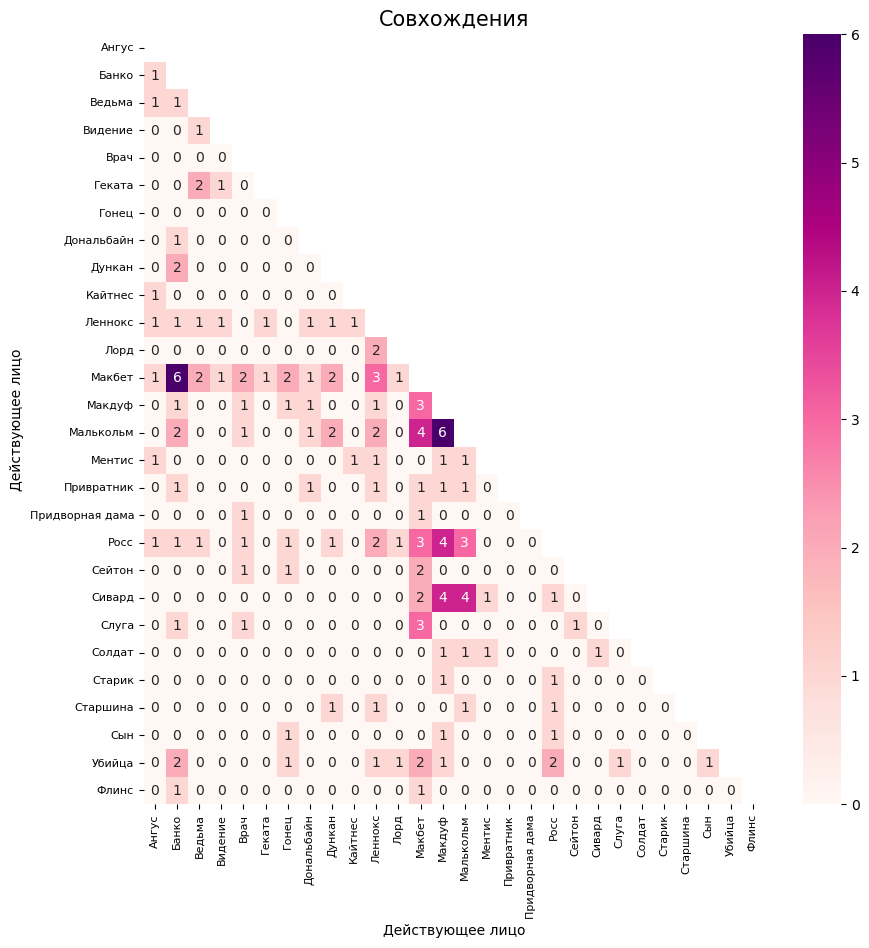

In [16]:
mask = np.triu(np.ones_like(hmap, dtype=bool))
fig, ax = plt.subplots(figsize=(10,10))
fig = sns.heatmap(hmap, mask=mask, cmap="RdPu", xticklabels=True, yticklabels=True, annot=True, ax=ax)
fig.axes.set_title("Совхождения",fontsize=15)
fig.set_xlabel("Действующее лицо",fontsize=10)
fig.set_ylabel("Действующее лицо",fontsize=10)
fig.tick_params(labelsize=8)
plt.show()

Время выполнения блока построения матрицы совхождения

In [17]:
print(time.time()-start_time)

2.223797559738159


## Заключение

В ходе данной лабораторной работы: 
* Сформирован алгоритм для извлечения разметки актов и сцен, а также действующих лиц сцены, исходя из закономерностей структуры документа;
* Составлен список для фильтрации результатов обработки корпуса;
* Составлен алгоритм для нормализации результатов обработки корпуса;
* Была сформирована тепловая карта сходства на основе действующих лиц пьесы Макбет; 
* Время выполнения алгоритма ~2 секунды